# Homework 5: Sampling and Probability (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, February 9** at **11:59pm**. Late work will not be accepted unless it follows the specific policy of the instructor.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck. Submit your homework 60-30 minutes to ensure that it will upload before the deadline.

- Output <u>all</u> code for a question to receive full credit.

- Check the file preview on Gradescope to make sure all of your answers are visible. Files should NOT be too large to preview.

- **All functions must have a docstring. Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.**


In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib
from matplotlib import pyplot as plt

## 1.  Earthquakes (10 points)

The next cell loads a table containing information about every earthquake above a magnitude of 4.5 in 2020 (prior to the time the file was downloaded on October 30, 2020), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [2]:
earthquakes = pd.read_csv('HW5 Data/earthquakes_2020.csv')[['time', 'mag', 'place']]
print(earthquakes.shape)
earthquakes.head(5)

(5402, 3)


,time,mag,place
0,2020-10-30T18:24:42.912Z,5.5,"50 km NNE of Oxapampa, Peru"
1,2020-10-30T18:01:44.159Z,5.0,"86 km WNW of Tari, Papua New Guinea"
2,2020-10-30T15:51:36.039Z,4.6,"37 km WSW of Ashkāsham, Afghanistan"
3,2020-10-30T15:14:56.384Z,5.2,"8 km NW of Kokkári, Greece"
4,2020-10-30T14:47:02.307Z,4.6,"80 km WSW of Kirakira, Solomon Islands"


This dataset shows all of the earthquakes that occurred in 2020. There are a lot of earthquakes that occured that year that are of interest, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in that year to get an idea about the distribution of magnitudes throughout the year!

**Question 1. (2pts)** 

In the following lines of code, we take two different samples from the earthquake data frame, and calculate the mean of the magnitudes of these earthquakes. 

What specific type(s) of sampling methods was used? Are these samples representative of the population of earthquakes in the original table (that is, should we expect the mean to be close to the population mean)?   Justify your answer and state any assumptions you are making.

In [5]:
sample1 = earthquakes.sort_values(by=['mag'], ascending = False).head(100)
sample1_magnitude_mean = np.mean(sample1.mag)

sample2 = earthquakes.head(100)
sample2_magnitude_mean = np.mean(sample2.mag)
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.359, 4.912000000000001]

**Type your response in this cell:** *What type of sampling methods were used? (Look at options from lecture and Lab) Are these samples representative of the population of earthquakes in the original table?*


Answer: Sample 1 uses extreme case sampling as it takes the 100 highest magnitude 
earthquakes. Sample 2 uses convenience sampling since we only sample the 100 most 
recent earthquakes.

Sample 1 is not representative due to high magnitudes. Sample 2 is representative 
since season does not impact earthquakes (time is irrelevant).


**Question 2. (2pts)** 

Write code producing a random sample of size 500 that represents the population, then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. Refer to sampling methods for dataframes discussed in class.

In [6]:
representative_sample = earthquakes.sample(500, replace=False)
representative_sample

representative_mean = representative_sample['mag'].mean()
representative_mean

4.781440000000001

**Question 3. (3 pts)** 

Suppose we want to figure out the mean magnitude of the earthquakes in 2020, but we could only use a sample of 500 from our `earthquakes` data.

To determine whether using this sample size is a plausible idea, write code that simulates the mean of a random sample of size 500 from `earthquakes`, simulated 5000 times. Assign your array of averages to the variable `means`. Print the average value of `means`


In [7]:
means = []
for i in np.arange(5000):
    representative_sample = earthquakes.sample(500, replace=False)
    representative_mean = representative_sample['mag'].mean()
    means.append(representative_mean)
means = np.array(means)
means

print(means.mean())

4.80450208


**Question 4. (1 pt)**
Plot a histogram of the values in your `means` variable.


Text(0, 0.5, 'Frequency')

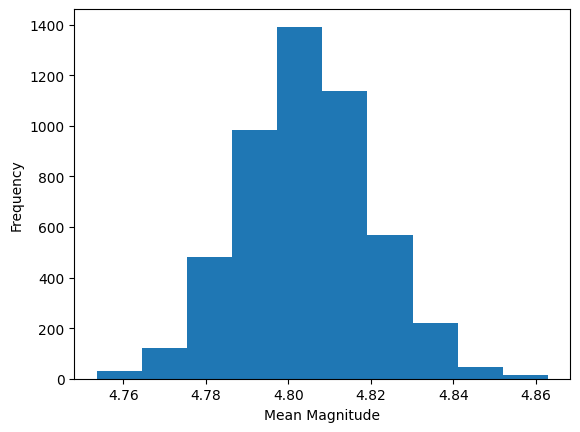

In [8]:
plt.hist(means)
plt.xlabel('Mean Magnitude')
plt.ylabel('Frequency')

**Question 5. (1 pt)** 

Find the magnitude of the (actual) strongest earthquake this year to help you determine your answer.


In [9]:
strongest_magnitude = earthquakes['mag'].max()
strongest_magnitude

7.8

**Question 6. (1 pt)** 

Based on your experiment above, is a single random sample of size 500 likely to help you determine the largest magnitude earthquake in the population?  Why or why not? 


It is unlikely to help since extreme values may not show up in a random sample
unless designed to like in sample1. With the current sampling method, we are more likely to get 
the max as sample size increases, but it is not guaranteed with a sample of 500.

## 2. Probability and Simulation (11pts)

**Question 7: (3pts)** Suppose you toss a coin 5 times in a row and record the total number of heads. How many elements are in the sample space? Write out the sample space. Does each outcome have the same probability? Why or why not?


S = {0, 1, 2, 3, 4, 5}

There are 6 elements in the sample space. They do not have the same probability. 
Any order in which we record outcomes (e.g HTHHH or TTTTT) each have the same 
probability, but the number of ways to observe the 5 coin tosses varies across certain counts of Heads. 
For example, there are more ways to get 1 Head (TTTHT, HTTTT, etc.) than there 
are to get all 5 heads (HHHHH). Adding the probabilities of each possible order for each count
creates variance in probability.

**Question 8: (2pts)**  Calculate the probability of getting exactly 1 head. Justify your work. 

We have a binomial distribution with p=0.5 and n=5. 
$$P(X=1) = {5 \choose 1}(0.5)^1(0.5)^4 = \frac{5!}{1! \space 4!}(0.5)^1(0.5)^4 = 0.15625$$

In [4]:
# Function defined in textbook
def binomial_prob(n, p, j):
  '''A function that calculates probabilities from a binomial distribution with parameters n and p'''
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))
  return  n_choose_j*p**j*(1-p)**(n-j)

binomial_prob(5, 0.5, 1)

/var/folders/s_/fr0jyz7s5qv1_648_n3yrj940000gn/T/ipykernel_21711/111834190.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))


0.15625

**Question 9: (5pts)** **Simulate this experiment and graph your results.** Simulate the above experiment of tossing a fair coin 5 times and recording the number of heads. You repeat this 10,000 times. Graph you resulting outcome with a histogram. (Make sure to label your resulting graph).

Text(0, 0.5, 'Frequency')

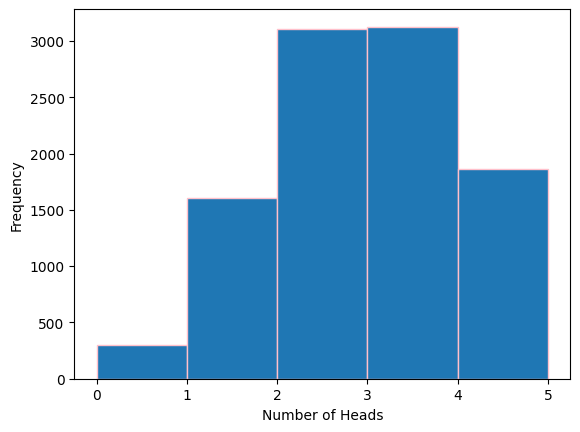

In [5]:
coin = np.array(['Heads', 'Tails'])
outcomes = []

for i in range(10000):
    num_heads = np.random.choice(coin, 5).tolist().count('Heads')
    outcomes.append(num_heads)
    
plt.hist(outcomes, bins=5, edgecolor='pink')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

**Question 10: (1pt)** Based on your experiment above. What was the probability of getting exactly 1 heads? (Use your data to find the empirical probability of getting exactly 1 head).

In [12]:
prob_one_head = outcomes.count(1) / 10000
prob_one_head

0.1564

## 3. Probability on a DataFrame (8pts)

Now we will investigate probabilities and conditional probabilities on the Titanic data! It will be useful to write out what you want to compute before starting immediately with the code.

In [13]:
titanic = pd.read_csv("HW5 Data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Question 11: (2 pts)** Suppose we choose a passenger at random from the given dataset. What is the probability the passenger is from class 1 (Pclass=1)?

In [14]:
prob_first_class = len(titanic.loc[titanic['Pclass'] == 1]) / len(titanic)
prob_first_class

0.24242424242424243

Suppose we choose a passenger at random from the data... compute the following.

**Question 12: (2 pts)**  What is the probability they survive given they are female?

In [15]:
num_female = len(titanic.loc[titanic['Sex'] == 'female'])
num_survived_female = len(titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])

prob_suvived_given_female = survived_female / female
prob_suvived_given_female

NameError: name 'survived_female' is not defined

**Question 13: (2 pts)** What is the probability they are in class 1 given they are in paid more than 30 units in Fare?

In [ ]:
paid_thirty = titanic.loc[titanic['Fare'] > 1]
paid_thirty_first_class = titanic.loc[(titanic['Pclass'] == 1) & (titanic['Fare'] > 1)]

prob_first_class_given_thirty = len(paid_thirty_first_class)/len(paid_thirty)
prob_first_class_given_thirty

0.2408675799086758

**Question 14: (2pts)** What is the probability they survive given they are in class 1 and female?

In [ ]:
first_class_female = titanic.loc[(titanic['Sex'] =='female') & (titanic['Pclass'] == 1)]
survived_female_first_class = first_class_female.loc[first_class_female['Survived'] == 1]

prob_surv_given_female_first = len(survived_female_first_class) / len(first_class_female)
prob_surv_given_female_first
    
                                 

0.9680851063829787

## 4. Card Deck (21 points) ##

This problem is about simulating blackjack hands (rules explained below) with simple rules for when the player asks for more cards and when the player "stands" (i.e. doesn't ask for more cards).

Cards are drawn without replacement from a deck of 52 cards:

A photo of a standard deck of cards is shown for your reference:

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/English_pattern_playing_cards_deck.svg/1599px-English_pattern_playing_cards_deck.svg.png?20170224191528" width="75%"/>

    
    


The 52-card deck includes 13 ranks (card numbers or faces) of four suits: clubs (♣), diamonds (♦), hearts (♥) and spades (♠).

The numbered cards 2-10 have values 2-10, the cards Jack, Queen, and King have value 10, and the card 1, called Ace, can have the value 1 or the value 11, whichever is more advantageous to the player.

Blackjack is a card game played against the dealer where the object of the game is to have a hand with a total value higher than the dealer's without going over a score of 21.

For more information see:

https://en.wikipedia.org/wiki/Blackjack


**Question 15. (2 pts)**

Write a function that creates symbols in <u>string</u> format for each of the cards in a deck of cards. (The collection of symbols will be the "deck"--to keep track of what cards have been used and not-yet-used for sampling without replacement.)

Use this function to create a variable called `string_deck` that corresponds to each card in a standard deck. In other words, your variable should be a list of 52 items, where each item is a string that corresponds to the specific <u>rank</u> and <u>suit</u> of the card. Call for `string_deck` to display the result.

You will want to use these characters:  "♣","♦","♥","♠", to represent suits. You can copy and paste them from this question.

In [ ]:
def deck():
    "Create a deck of cards as a list"
    suits = ['♣', '♦', '♥', '♠']
    ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    deck = []
    for suit in suits:
        for rank in ranks:
            deck.append(rank + suit)
    return deck

string_deck = deck()
string_deck

['A♣',
 '2♣',
 '3♣',
 '4♣',
 '5♣',
 '6♣',
 '7♣',
 '8♣',
 '9♣',
 '10♣',
 'J♣',
 'Q♣',
 'K♣',
 'A♦',
 '2♦',
 '3♦',
 '4♦',
 '5♦',
 '6♦',
 '7♦',
 '8♦',
 '9♦',
 '10♦',
 'J♦',
 'Q♦',
 'K♦',
 'A♥',
 '2♥',
 '3♥',
 '4♥',
 '5♥',
 '6♥',
 '7♥',
 '8♥',
 '9♥',
 '10♥',
 'J♥',
 'Q♥',
 'K♥',
 'A♠',
 '2♠',
 '3♠',
 '4♠',
 '5♠',
 '6♠',
 '7♠',
 '8♠',
 '9♠',
 '10♠',
 'J♠',
 'Q♠',
 'K♠']

**Question 16. (2 pts)**

Suppose you draw two cards (without replacement). What is the probability of both of the cards you draw being Queens? Show your work mathematically and print/call for your answer.

In [ ]:
prob_both_queens = (4/52) * (3/51)
print(prob_both_queens)

0.004524886877828055


**Question 17. (3 pts)**

Create some code that simulates this scenario 10000 times. Use this to check your answer to Question 16. Print/call for the final probability.

In [ ]:
num_double_queens = 0
for i in range(10000):
    draw = np.random.choice(string_deck, 2, replace=False).tolist()
    if draw.count('Q') == 2:
        num_double_queens += 1

print(num_double_queens / 10000)


0.0


**Question 18. (2 pt)**

Now, back to blackjack. If the first card you draw is a 10, what is the probability that a second card will bring your point total to 20? Note, in blackjack cards are drawn without replacement.

Show your work mathematically and print/call for your answer.

In [ ]:
conditional_probability = (16/52 * 15/51) / (16/52)
print(conditional_probability)

0.29411764705882354


**Question 19. (5 pts)**

Write a function `points` that counts the point values for a hand of cards in blackjack.

Remember Ace's are assigned a value of 11 unless that would make the total score go over 21, in which case they are assigned a value of 1.

HINT: It might be useful to assume a value of 1 initially for Ace's, and adjust at the end.

In [ ]:
#The following dictionary might be helpful, feel free to change this if you defined your deck differently
values = {"A":11,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"J":10,"Q":10,"K":10}

def points(cards):
    """
    Assign point value to Blackjack deck and while choosing Ace value to optimize
    outcome
    """
    hand_score = 0
    for card in cards:
        card = card.replace('♣',"").replace('♦', "").replace('♥', "").replace('♠', "")
        hand_score += values[card]
        if hand_score > 21 and card == 'A':
            hand_score -= 10
    return hand_score




In [ ]:
# Here are a handful of test cases, which should all be True:
( points(['5♦']) == 5,
  points(['A♦', 'A♣', 'A♠', 'A♦']) == 14,
  points(['J♦', 'A♣'] ) == 21,
  points(['5♦', '4♦', 'A♣'] ) == 20,
  points(['K♦', 'Q♦', 'A♣'] ) == 21,
  points(['5♣', 'K♦']) == 15)
 

(True, True, True, True, True, True)

**Question 20.** (**5 pts**)

In blackjack, the dealer must draw until they get a hand worth at least 17 points.

Write a function `drawhand()` to draw a hand of blackjack, adding cards until the (most advantageous) total number of points is at least 17.  `drawhand` should return the point value of the hand and a list containing the cards in the hand.

Hint1: `return(arg1, arg2)` is the syntax used to return 2 things from a function

Hint2: For this question, a different type of "loop" called a while loop might be useful. Here are two examples:

In [ ]:
x = 0
while x < 10: # while this condition is true...
    print(x) #...do what is indented
    x = x+1

0
1
2
3
4
5
6
7
8
9


In [ ]:
index = 0    
my_list = [1,3,5,7,6,12]
while sum(my_list[0:index]) < 15:
    index = index + 1
    print(my_list[0:index])
    print('sum: ' + str(sum(my_list[0:index])) )

[1]
sum: 1
[1, 3]
sum: 4
[1, 3, 5]
sum: 9
[1, 3, 5, 7]
sum: 16


In [ ]:
def drawhand():
    """Draws a hand of blackjack until number of points reaches at least 17
    Returns [tuple[int, lst]]: 
    """
    deck_of_cards = deck()
    hand = []
    while points(hand) <= 17:
        card = np.random.choice(deck_of_cards,replace=False)
        hand.append(card)
        deck_of_cards.remove(card)
    return points(hand), hand

drawhand()

(18, ['2♣', '6♠', 'Q♥'])

In [ ]:
# Test for any values < 17
num_error = 0
for _ in range(10000):
    score, hand = drawhand()
    if score < 17:
        num_error += 1
num_error

0

**Question 21.  (2 pts)**

Using the function you wrote in Question 20, estimate the probability the dealer draws a hand that "busts", meaning the dealer's hand exceeds 21 points.

Hint: `var1, var2 = function(arg)` is the syntax used to define 2 variables using a function that returns 2 things

In [ ]:
num_busts = 0
for _ in range(10000):
    score, hand = drawhand()
    if score > 21:
        num_busts += 1

bust_probability = num_busts / 10000
bust_probability

0.3881